In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    return sigm(z)*(1.0 - sigm(z))

In [5]:
class Problem2:
    def __init__(self, nr_input_neurons, nr_hidden_neruons, nr_output_neruons):
        self.nr_input_neurons = nr_input_neurons
        self.nr_output_neruons =nr_output_neruons

        self.train_inputs = np.array([ [1,1,0], [1,-1,-1], [-1,1,1], [-1,-1,1], [0,1,-1], [0,-1,-1], [1,1,1] ])
        self.train_target_output = np.array([[1,0], [0,1], [1,1], [1,0], [1,0], [1,1], [1,1]]) 

        np.random.seed(13)

        # hidden layer of n neurons and i inputs
        self.w2 = np.random.randn(nr_hidden_neruons,nr_input_neurons)
        self.b2 = np.random.randn(nr_hidden_neruons,1)

        # output layer of n neuron and i inputs
        self.w3 = np.random.randn(nr_output_neruons,nr_hidden_neruons)
        self.b3 = np.random.randn(nr_output_neruons,1)

    def feedforward(self, inputs):
        # here we muplitply the weight by the input and add the bias to it
        neurons_layer2 = sigm(self.w2.dot(inputs) + self.b2)
        neurons_layer3 = sigm(self.w3.dot(neurons_layer2) + self.b3)

        return neurons_layer3 # we return the output

    def predict(self, input):
        lay3 = self.feedforward(input)
        ans = []
        # print("\n prediction: ", lay3, "Shape: ", lay3.shape)
        for i in range(self.nr_output_neruons):
            if lay3[i] >= 0.5:
                ans.append([1])
            else: ans.append([0])
        return ans

    def backprop(self, inputs, target_output):
        delta_w2 = np.zeros(self.w2.shape, dtype=float)
        delta_b2 = np.zeros(self.b2.shape, dtype=float)

        delta_w3 = np.zeros(self.w3.shape, dtype=float)
        delta_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0

        # zip allows you to iterate two lists at the same time
        # letters = ['a', 'b', 'c'] & numbers = [1, 2, 3]
        # a -> 1, b -> 2, c -> 3
        for x, y in zip(inputs, target_output):
            a1 = x.reshape(self.nr_input_neurons,1)     # convert input vector x into (3,1) column vector since there are 3 input neurons
            z2 = self.w2.dot(a1) + self.b2       # z2 and a2 will be a (4,1) column vector since 
            a2 = sigm(z2)                        # column vector shape (4,1)

            z3 = self.w3.dot(a2) + self.b3       # a simple number in a (1,1) column vector
            a3 = sigm(z3)                        # so is a3 , a3 = output layer

            y = y.reshape(self.nr_output_neruons,1)                   # reshape the output layer have 2 output neurons 

            delta3 = (a3-y) *sigm_deriv(z3)      # delta3.shape is (1,1)

            delta2= sigm_deriv(z2) * self.w3.T.dot(delta3)  # w3 shape is (1,4), w3.T shape is (4,1)
                                                            # delta2 is shape (4,1)
                            
            delta_b3 += delta3
            delta_w3 += delta3.dot(a2.T)    # shape (1,1) by (1,4) gives (1,4)

            delta_b2 += delta2
            delta_w2 += delta2.dot(a1.T)      # shape (4,1) by (1,4) gives (4,4)

            cost += ((a3-y)**2).sum()
        n = len(target_output)  # number of training vectors           
        # get the average change per training input
        return delta_b2/n, delta_w2/n, delta_b3/n, delta_w3/n, cost/n 

    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_target_output
        cost = np.zeros((epochs,))

        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3

        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.plot(cost)
        return cost   

First set:  [[0.77518593 0.67114562 0.76423654 0.69537841 0.70079225 0.6676871
  0.80085997]
 [0.84581876 0.55363591 0.76397183 0.57998949 0.61342219 0.52133917
  0.89440655]]
Final set:  [[0.99970789 0.08656781 0.99995623 0.99974031 0.99986626 0.91761095
  0.99993939]
 [0.03213904 0.99816046 0.98331092 0.07804064 0.00466292 0.9112085
  0.97097406]]
10 = 1,1,0:  [[1], [0]]
01 = 1,-1,-1:  [[0], [1]]


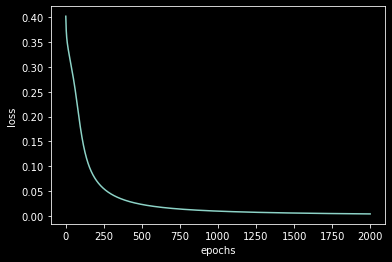

In [6]:
# Train for problem1
problem2 = Problem2(3,3,2)
xs = problem2.train_inputs.T
print("First set: ",problem2.feedforward(xs))

epochs = 2000
trainSet = problem2.train(epochs, 3.5)
print("Final set: ",problem2.feedforward(xs))

print("10 = 1,1,0: ", problem2.predict(np.array([[1],[1],[0]])))
print("01 = 1,-1,-1: ", problem2.predict(np.array([[1],[-1],[-1]])))